<a href="https://colab.research.google.com/github/ShahidaPervin/Refugee_Impact/blob/main/BDmap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt-get install -y libspatialindex-dev
!pip install geopandas shapely fiona pyproj rtree


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libspatialindex-c6 libspatialindex6
The following NEW packages will be installed:
  libspatialindex-c6 libspatialindex-dev libspatialindex6
0 upgraded, 3 newly installed, 0 to remove and 1 not upgraded.
Need to get 319 kB of archives.
After this operation, 1,416 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libspatialindex6 amd64 1.9.3-2 [247 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libspatialindex-c6 amd64 1.9.3-2 [55.8 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libspatialindex-dev amd64 1.9.3-2 [16.0 kB]
Fetched 319 kB in 2s (170 kB/s)
Selecting previously unselected package libspatialindex6:amd64.
(Reading database ... 117528 files and directories currently installed.)
Preparing to unpack .../libspatialindex6_1.9.3-2_amd64.deb ...
Unpa

In [ ]:
# To import data from Git folder (this folder did not work, so directly downloaded)
!git clone https://github.com/ShahidaPervin/Refugee_Impact.git


Cloning into 'Refugee_Impact'...
remote: Enumerating objects: 66, done.
remote: Counting objects: 100% (66/66), done.
remote: Compressing objects: 100% (59/59), done.
remote: Total 66 (delta 25), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (66/66), 9.25 MiB | 4.89 MiB/s, done.
Resolving deltas: 100% (25/25), done.


In [ ]:
import os
os.chdir("Refugee_Impact/Shapefiles")

In [ ]:
# Varify files
os.listdir()

['gadm41_BGD_1.dbf',
 'gadm41_BGD_1.shp',
 'gadm41_BGD_1.cpg',
 'gadm41_BGD_1.prj',
 'gadm41_BGD_2.shx',
 'gadm41_BGD_1.shx',
 'gadm41_BGD_2.prj',
 'gadm41_BGD_2.shp',
 'gadm41_BGD_2.cpg',
 'gadm41_BGD_2.dbf']

In [ ]:
# Download Bangladesh from : https://geodata.ucdavis.edu/gadm/gadm4.1/shp/gadm41_BGD_shp.zip
#

In [ ]:
# Then upload the downloaded file directly
from google.colab import files
uploaded = files.upload()

Saving gadm41_BGD_shp.zip to gadm41_BGD_shp.zip


In [ ]:
# Unzip the uploaded file
!unzip gadm41_BGD_shp.zip

Archive:  gadm41_BGD_shp.zip
 extracting: gadm41_BGD_0.cpg        
  inflating: gadm41_BGD_0.dbf        
  inflating: gadm41_BGD_0.prj        
  inflating: gadm41_BGD_0.shp        
  inflating: gadm41_BGD_0.shx        
replace gadm41_BGD_1.cpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y, A
 extracting: gadm41_BGD_1.cpg        
replace gadm41_BGD_1.dbf? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: gadm41_BGD_1.dbf        
replace gadm41_BGD_1.prj? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: gadm41_BGD_1.prj        
  inflating: gadm41_BGD_1.shp        
  inflating: gadm41_BGD_1.shx        
 extracting: gadm41_BGD_2.cpg        
  inflating: gadm41_BGD_2.dbf        
  inflating: gadm41_BGD_2.prj        
  inflating: gadm41_BGD_2.shp        
  inflating: gadm41_BGD_2.shx        
 extracting: gadm41_BGD_3.cpg        
  inflating: gadm41_BGD_3.dbf        
  inflating: gadm41_BGD_3.prj        
  inflating: gadm41_BGD_3.shp        
  inflating: gadm41_BGD_3.shx        
 extractin

In [ ]:
import geopandas as gpd

divisions = gpd.read_file("gadm41_BGD_1.shp")
districts = gpd.read_file("gadm41_BGD_2.shp")

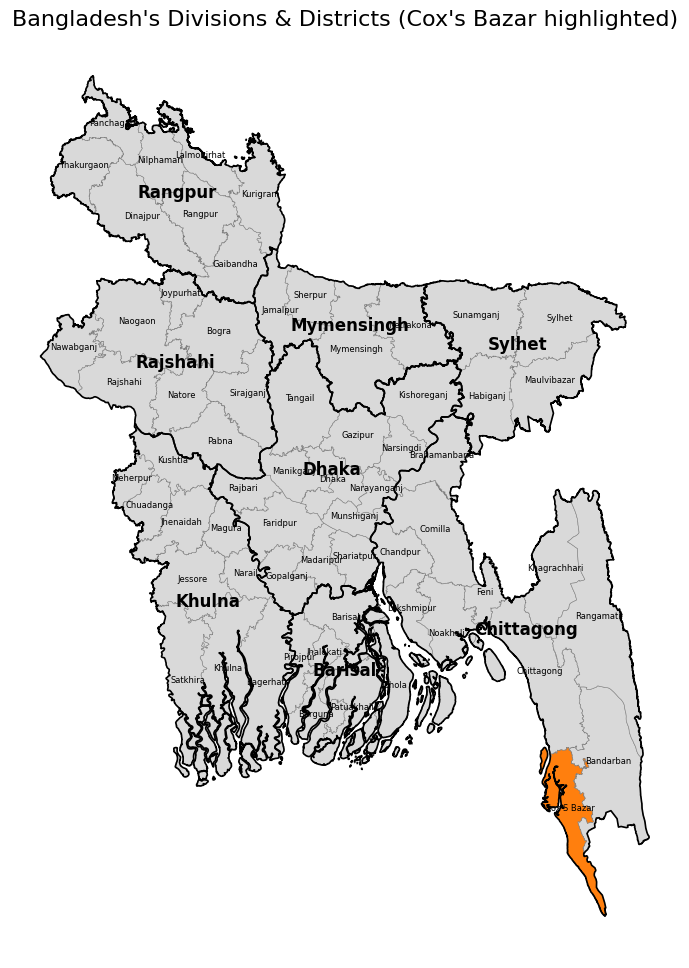

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import matplotlib.pyplot as plt

# Load shapefiles (already uploaded to Colab)
divisions = gpd.read_file("gadm41_BGD_1.shp")
districts = gpd.read_file("gadm41_BGD_2.shp")

# Create a color column to highlight Cox's Bazar
districts["color"] = districts["NAME_2"].apply(
    lambda x: "#ff7f0e" if x.lower() == "cox's bazar" else "#d9d9d9"
)

# Plot
fig, ax = plt.subplots(figsize=(12,12))

# Districts (light gray) + Cox's Bazar (orange)
districts.plot(
    ax=ax,
    color=districts["color"],
    edgecolor="gray",
    linewidth=0.4
)

# Divisions (bold boundaries)
divisions.boundary.plot(
    ax=ax,
    color="black",
    linewidth=1.2
)

# Add district labels
for idx, row in districts.iterrows():
    ax.annotate(
        text=row["NAME_2"],
        xy=(row.geometry.centroid.x, row.geometry.centroid.y),
        ha="center",
        fontsize=6
    )

# Add division labels
for idx, row in divisions.iterrows():
    ax.annotate(
        text=row["NAME_1"],
        xy=(row.geometry.centroid.x, row.geometry.centroid.y),
        ha="center",
        fontsize=12,
        fontweight="bold"
    )

ax.set_title("Bangladesh's Divisions & Districts (Cox's Bazar highlighted)", fontsize=16)
ax.set_axis_off()

plt.savefig("bangladesh_rakhine_map.png", dpi=300, bbox_inches="tight")
plt.show()

from google.colab import files
files.download("bangladesh_rakhine_map.png")
